In [ ]:
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'  



In [ ]:
import numpy as np
import pandas as pd


In [4]:
import baostock as bs
lg = bs.login()

login success!


In [5]:
rs = bs.query_history_k_data_plus("sh.600000",
    "date,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,isST",
    start_date='2017-07-01', end_date='2017-12-31',
    frequency="d", adjustflag="3")

In [ ]:
data_list = []
while (rs.error_code == '0') & rs.next():
    # 获取一条记录，将记录合并在一起
    data_list.append(rs.get_row_data())
data = pd.DataFrame(data_list, columns=rs.fields)


In [7]:
data.head()

,date,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,isST
0,2017-07-03,sh.600000,12.6400,12.6500,12.4700,12.5600,12.6500,38778949,486264672.0000,3,0.137985,1,-0.711456,0
1,2017-07-04,sh.600000,12.5500,12.5800,12.4100,12.5500,12.5600,36659128,458434432.0000,3,0.130442,1,-0.079620,0
2,2017-07-05,sh.600000,12.5000,12.6500,12.4700,12.6200,12.5500,26470507,332542464.0000,3,0.094188,1,0.557767,0
3,2017-07-06,sh.600000,12.6200,12.7200,12.5100,12.6600,12.6200,37414241,471582096.0000,3,0.133129,1,0.316957,0
4,2017-07-07,sh.600000,12.6200,12.6900,12.5500,12.6000,12.6600,24667294,311101536.0000,3,0.087772,1,-0.473929,0


In [8]:
data['date'] = pd.to_datetime(data['date'])

In [9]:
data.set_index('date', inplace = True) 

In [10]:
data.head()

,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,isST
date,,,,,,,,,,,,,
2017-07-03,sh.600000,12.6400,12.6500,12.4700,12.5600,12.6500,38778949,486264672.0000,3,0.137985,1,-0.711456,0
2017-07-04,sh.600000,12.5500,12.5800,12.4100,12.5500,12.5600,36659128,458434432.0000,3,0.130442,1,-0.079620,0
2017-07-05,sh.600000,12.5000,12.6500,12.4700,12.6200,12.5500,26470507,332542464.0000,3,0.094188,1,0.557767,0
2017-07-06,sh.600000,12.6200,12.7200,12.5100,12.6600,12.6200,37414241,471582096.0000,3,0.133129,1,0.316957,0
2017-07-07,sh.600000,12.6200,12.6900,12.5500,12.6000,12.6600,24667294,311101536.0000,3,0.087772,1,-0.473929,0


In [11]:
data.rename(columns={'close': 'price'}, inplace=True) 

In [12]:
data['SMA_1'] = data['price'].rolling(1).mean() 
data['SMA_5'] = data['price'].rolling(5).mean() 
data['SMA_10'] = data['price'].rolling(10).mean()
data['SMA_15'] = data['price'].rolling(15).mean() 
data['SMA_20'] = data['price'].rolling(20).mean()

<Axes: title={'center': ' SMAs'}, xlabel='date'>

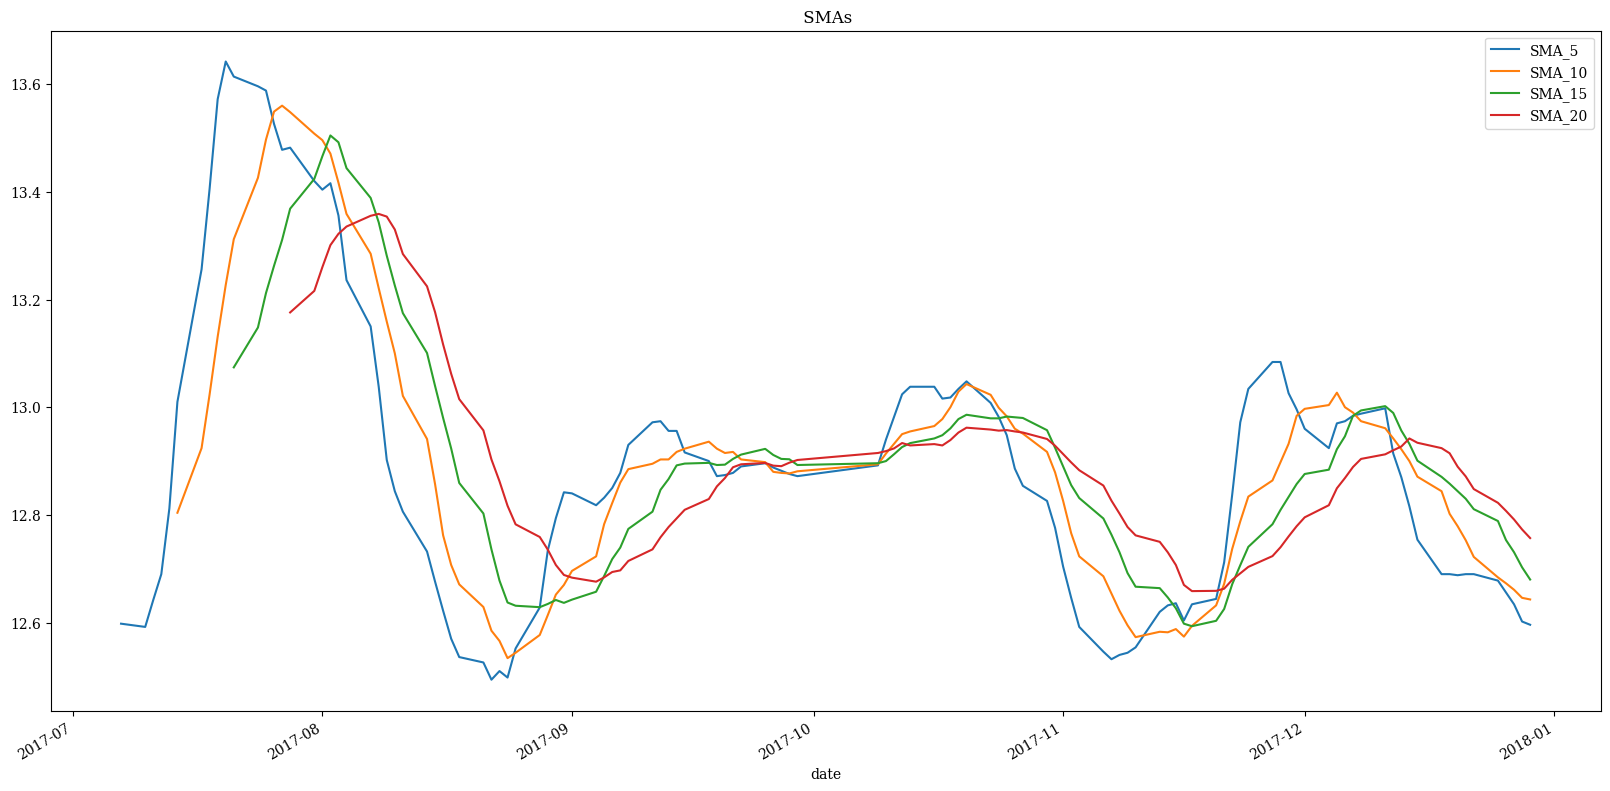

In [13]:
data[['price','SMA_5','SMA_10','SMA_15','SMA_20']].plot(title=' SMAs',
                                       figsize=(20, 10))